# El modelo de Holmstrom y Tirole (1997)

In [656]:
using DataFrames
using Plots

$$ \bar{A}(\gamma) = I - \frac{P_H}{\gamma}  \left(R - \frac{B}{\Delta p} \right)$$

$$ \underline{A}(\gamma, \beta) = I - \frac{P_H}{\beta} \frac{c}{\Delta p} - \frac{P_H}{\gamma} \left(  R - \frac{(b + c)}{\Delta p} \right)$$

$$ A_m(\beta) = I - \frac{P_H}{\beta} \frac{c}{\Delta p} $$

$\gamma = r^*$

$ \beta = r $

In [657]:
A_high(γ, I, P_H, R, B, Δp) = I - P_H/γ * (R - B/Δp)

A_high (generic function with 1 method)

In [658]:
A_low(γ, β, I, P_H, c, Δp, R, b) = I - P_H/β * c/Δp - P_H/γ * (R - (b + c)/Δp)

A_low (generic function with 1 method)

In [659]:
A_m(β, I, P_H, c, Δp) = I - P_H/β * c/Δp

A_m (generic function with 1 method)

### Caso inicial

In [660]:
P_H = 0.9
P_L = 0.75
Δp = 0.15
B =  0.12
b = 0.06
c = 0.09
r = 1.26
r⃰ = 1.05
R = 1.2
I = 1;

In [661]:
A_low(r⃰, r, I, P_H, c, Δp, R, b)

0.4

In [662]:
A_high(r⃰, I, P_H, R, B, Δp)

0.6571428571428573

In [663]:
A_m(r, I, P_H, c, Δp)

0.5714285714285714

In [664]:
A_array = [0.25 , 0.255, 0.26 , 0.29 , 0.295, 0.302, 0.354, 0.381, 0.394, 0.396,
           0.401, 0.403, 0.405, 0.407, 0.41 , 0.412, 0.416, 0.419, 0.421, 0.425,
           0.43 , 0.432, 0.435, 0.44 , 0.442, 0.446, 0.448, 0.45 , 0.452, 0.46 ,
           0.465, 0.467, 0.47 , 0.476, 0.48 , 0.483, 0.485, 0.489, 0.491, 0.497,
           0.502, 0.506, 0.508, 0.51 , 0.515, 0.518, 0.52 , 0.523, 0.524, 0.528,
           0.53 , 0.536, 0.538, 0.541, 0.547, 0.553, 0.576, 0.594, 0.603, 0.604,
           0.609, 0.615, 0.617, 0.62 , 0.624, 0.63 , 0.635, 0.637, 0.641, 0.645,
           0.646, 0.65 , 0.654, 0.656, 0.658, 0.659, 0.661, 0.665, 0.668, 0.671,
           0.673, 0.676, 0.678, 0.68 , 0.683, 0.69 , 0.691, 0.703, 0.71 , 0.724,
           0.732, 0.74 , 0.752, 0.76 , 0.77 , 0.774, 0.78 , 0.785, 0.8  , 0.83 ];

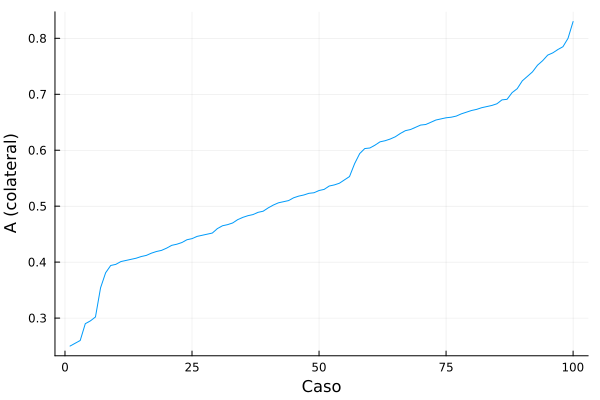

In [665]:
plot(A_array, xlab="Caso", ylab="A (colateral)", label=:none)

In [666]:
function histograma(A_array, r, r⃰, c, B, b)
    b_range = range(0.25, 0.83, length=28)
    histogram(A_array, bins=b_range, label=:none)
    vline!([A_low(r⃰, r, I, P_H, c, Δp, R, b)], linewidth=3, label="A_low")
    vline!([A_m(r, I, P_H, c, Δp)], linewidth=3, label="A_m")
    vline!([A_high(r⃰, I, P_H, R, B, Δp)], linewidth=3, label="A_high")
end

histograma (generic function with 1 method)

In [667]:
function results(A_array, r, r⃰, c, B, b)
    df = DataFrame(A=A_array)
    df.credit = ifelse.(df.A .> A_low(r⃰, r, I, P_H, c, Δp, R, b), "SI", "NO")
    df.Im = ifelse.(((df.credit .== "SI") .&& (df.A .< A_high(r⃰, I, P_H, R, B, Δp))), (P_H/r * c/Δp), 0)
    df.Iu = ifelse.((df.credit .== "SI") .&& ((I .- df.A .- df.Im) .> 0), (I .- df.A .- df.Im), 0)
    df.I = ifelse.(df.credit .== "SI", df.A .+ df.Im .+ df.Iu, 0)

    df.Rm = ifelse.(df.credit .== "SI", r .* df.Im ./ P_H, 0)
    df.Ru = ifelse.(df.credit .== "SI", r⃰ .* df.Iu ./ P_H, 0)
    df.Rf = ifelse.(df.credit .== "SI", R .- df.Rm .- df.Ru, 0)

    return df
end

results (generic function with 1 method)

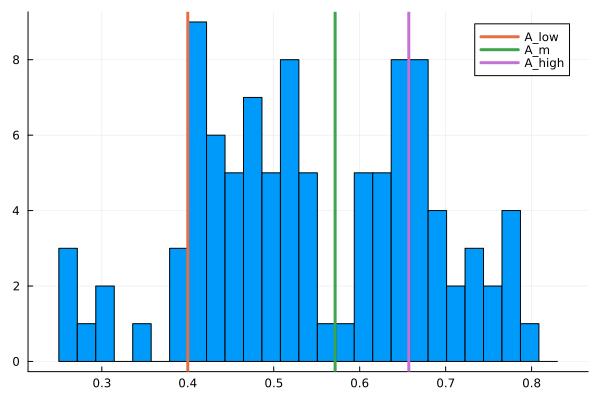

In [668]:
histograma(A_array, r, r⃰, c, B, b)

In [669]:
results(A_array, r, r⃰, c, B, b)
# show(results(A_array, r, r⃰, c, B, b), allrows=true)

Row,A,credit,Im,Iu,I,Rm,Ru,Rf
,Float64,String,Real,Real,Real,Real,Real,Real
1,0.25,NO,0,0,0,0,0,0
2,0.255,NO,0,0,0,0,0,0
3,0.26,NO,0,0,0,0,0,0
4,0.29,NO,0,0,0,0,0,0
5,0.295,NO,0,0,0,0,0,0
6,0.302,NO,0,0,0,0,0,0
7,0.354,NO,0,0,0,0,0,0
8,0.381,NO,0,0,0,0,0,0
9,0.394,NO,0,0,0,0,0,0


In [670]:
length(results(A_array, r, r⃰, c, B, b)[results(A_array, r, r⃰, c, B, b).credit .== "SI", :A])

90

In [671]:
sum(results(A_array, r, r⃰, c, B, b)[results(A_array, r, r⃰, c, B, b).credit .== "SI", :A])

51.625

In [672]:
sum(results(A_array, r, r⃰, c, B, b)[!, :Im])

27.428571428571395

In [673]:
sum(results(A_array, r, r⃰, c, B, b)[!, :Iu])

11.916714285714288

In [674]:
sum(results(A_array, r, r⃰, c, B, b)[!, :I])

90.97028571428571

In [675]:
sum(results(A_array, r, r⃰, c, B, b)[results(A_array, r, r⃰, c, B, b).credit .== "SI", :A]) + sum(results(A_array, r, r⃰, c, B, b)[!, :Im]) + sum(results(A_array, r, r⃰, c, B, b)[!, :Iu])

90.97028571428568

In [676]:
sum(results(A_array, r, r⃰, c, B, b)[!, :Rm])

38.40000000000004

In [677]:
sum(results(A_array, r, r⃰, c, B, b)[!, :Ru])

13.90283333333333

In [678]:
sum(results(A_array, r, r⃰, c, B, b)[!, :Rf])

55.69716666666669

### Incremento en $r$

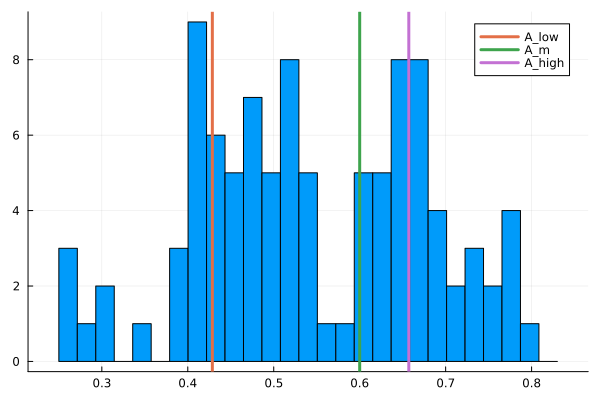

In [679]:
histograma(A_array, 1.35, r⃰, c, B, b)

In [680]:
results(A_array, 1.35, r⃰, c, B, b)

Row,A,credit,Im,Iu,I,Rm,Ru,Rf
,Float64,String,Real,Real,Real,Real,Real,Real
1,0.25,NO,0,0,0,0,0,0
2,0.255,NO,0,0,0,0,0,0
3,0.26,NO,0,0,0,0,0,0
4,0.29,NO,0,0,0,0,0,0
5,0.295,NO,0,0,0,0,0,0
6,0.302,NO,0,0,0,0,0,0
7,0.354,NO,0,0,0,0,0,0
8,0.381,NO,0,0,0,0,0,0
9,0.394,NO,0,0,0,0,0,0


### Incremento en $r^*$

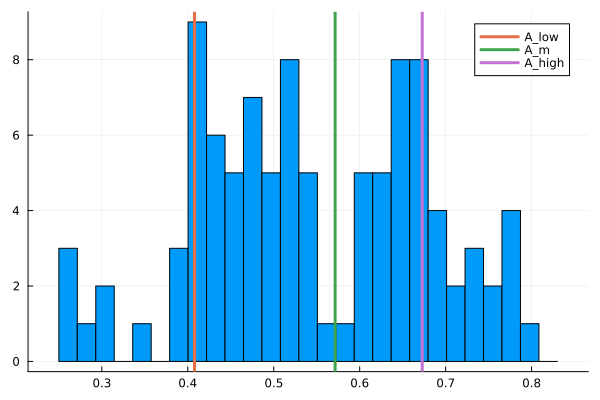

In [681]:
histograma(A_array, r, 1.1, c, B, b)

In [682]:
results(A_array, r, 1.1, c, B, b)

Row,A,credit,Im,Iu,I,Rm,Ru,Rf
,Float64,String,Real,Real,Real,Real,Real,Real
1,0.25,NO,0,0,0,0,0,0
2,0.255,NO,0,0,0,0,0,0
3,0.26,NO,0,0,0,0,0,0
4,0.29,NO,0,0,0,0,0,0
5,0.295,NO,0,0,0,0,0,0
6,0.302,NO,0,0,0,0,0,0
7,0.354,NO,0,0,0,0,0,0
8,0.381,NO,0,0,0,0,0,0
9,0.394,NO,0,0,0,0,0,0


### Incremento en $c$

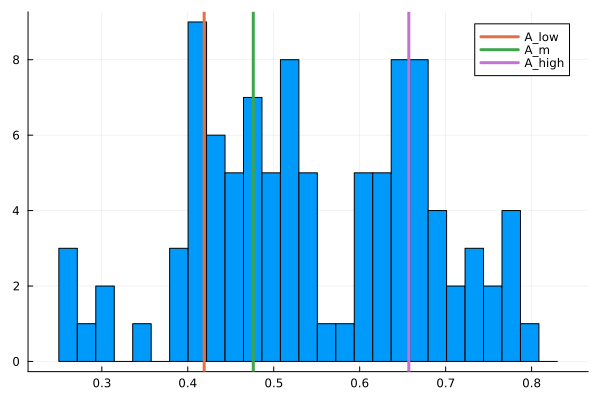

In [683]:
histograma(A_array, r, r⃰, 0.11, B, b)

In [684]:
results(A_array, r, r⃰, 0.11, B, b)

Row,A,credit,Im,Iu,I,Rm,Ru,Rf
,Float64,String,Real,Real,Real,Real,Real,Real
1,0.25,NO,0,0,0,0,0,0
2,0.255,NO,0,0,0,0,0,0
3,0.26,NO,0,0,0,0,0,0
4,0.29,NO,0,0,0,0,0,0
5,0.295,NO,0,0,0,0,0,0
6,0.302,NO,0,0,0,0,0,0
7,0.354,NO,0,0,0,0,0,0
8,0.381,NO,0,0,0,0,0,0
9,0.394,NO,0,0,0,0,0,0


### Incremento en $B$

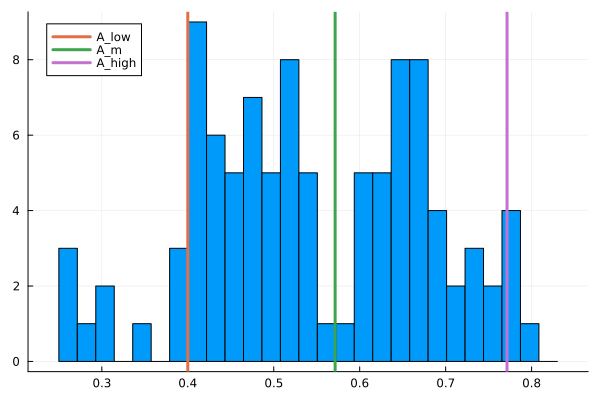

In [685]:
histograma(A_array, r, r⃰, c, 0.14, b)

In [686]:
results(A_array, r, r⃰, c, 0.14, b)

Row,A,credit,Im,Iu,I,Rm,Ru,Rf
,Float64,String,Real,Real,Real,Real,Real,Real
1,0.25,NO,0,0,0,0,0,0
2,0.255,NO,0,0,0,0,0,0
3,0.26,NO,0,0,0,0,0,0
4,0.29,NO,0,0,0,0,0,0
5,0.295,NO,0,0,0,0,0,0
6,0.302,NO,0,0,0,0,0,0
7,0.354,NO,0,0,0,0,0,0
8,0.381,NO,0,0,0,0,0,0
9,0.394,NO,0,0,0,0,0,0


### Incremento en $b$

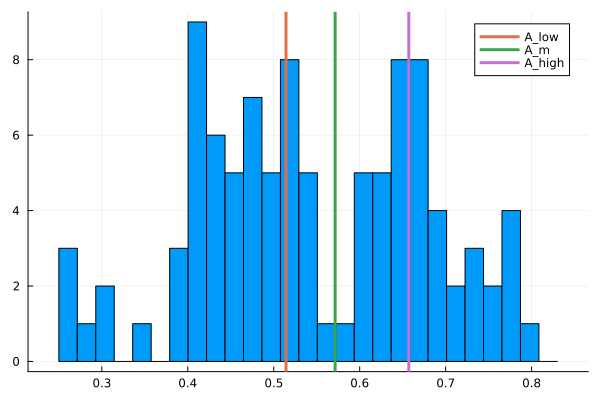

In [687]:
histograma(A_array, r, r⃰, c, B, 0.08)

In [688]:
results(A_array, r, r⃰, c, B, 0.08)

Row,A,credit,Im,Iu,I,Rm,Ru,Rf
,Float64,String,Real,Real,Real,Real,Real,Real
1,0.25,NO,0,0,0,0,0,0
2,0.255,NO,0,0,0,0,0,0
3,0.26,NO,0,0,0,0,0,0
4,0.29,NO,0,0,0,0,0,0
5,0.295,NO,0,0,0,0,0,0
6,0.302,NO,0,0,0,0,0,0
7,0.354,NO,0,0,0,0,0,0
8,0.381,NO,0,0,0,0,0,0
9,0.394,NO,0,0,0,0,0,0


Sintetizando

In [689]:
resultados_ht = DataFrame(Caso=["Caso inicial", "↑r (r=1.35)", "↑r* (r*=1.1)",
                                "↑c (c=0.11)", "↑B (B=0.14)", "↑b (b=0.08)"],
                    Empresas=1:6, Colateral=1:6, CreditoBancario=1:6,
                    CreditoMercadoCap=1:6, Inversion=1:6);

In [690]:
resultados_ht.Empresas = [length(results(A_array, r, r⃰, c, B, b)[results(A_array, r, r⃰, c, B, b).credit .== "SI", :A]),
                    length(results(A_array, 1.35, r⃰, c, B, b)[results(A_array, 1.35, r⃰, c, B, b).credit .== "SI", :A]),
                    length(results(A_array, r, 1.1, c, B, b)[results(A_array, r, 1.1, c, B, b).credit .== "SI", :A]),
                    length(results(A_array, r, r⃰, 0.11, B, b)[results(A_array, r, r⃰, 0.11, B, b).credit .== "SI", :A]),
                    length(results(A_array, r, r⃰, c, 0.14, b)[results(A_array, r, r⃰, c, 0.14, b).credit .== "SI", :A]),
                    length(results(A_array, r, r⃰, c, B, 0.08)[results(A_array, r, r⃰, c, B, 0.08).credit .== "SI", :A])];

In [691]:
resultados_ht.Colateral = round.([sum(results(A_array, r, r⃰, c, B, b)[results(A_array, r, r⃰, c, B, b).credit .== "SI", :A]),
                    sum(results(A_array, 1.35, r⃰, c, B, b)[results(A_array, 1.35, r⃰, c, B, b).credit .== "SI", :A]),
                    sum(results(A_array, r, 1.1, c, B, b)[results(A_array, r, 1.1, c, B, b).credit .== "SI", :A]),
                    sum(results(A_array, r, r⃰, 0.11, B, b)[results(A_array, r, r⃰, 0.11, B, b).credit .== "SI", :A]),
                    sum(results(A_array, r, r⃰, c, 0.14, b)[results(A_array, r, r⃰, c, 0.14, b).credit .== "SI", :A]),
                    sum(results(A_array, r, r⃰, c, B, 0.08)[results(A_array, r, r⃰, c, B, 0.08).credit .== "SI", :A])], digits=2);

In [692]:
resultados_ht.CreditoBancario = round.([sum(results(A_array, r, r⃰, c, B, b)[!, :Im]),
                    sum(results(A_array, 1.35, r⃰, c, B, b)[!, :Im]),
                    sum(results(A_array, r, 1.1, c, B, b)[!, :Im]),
                    sum(results(A_array, r, r⃰, 0.11, B, b)[!, :Im]),
                    sum(results(A_array, r, r⃰, c, 0.14, b)[!, :Im]),
                    sum(results(A_array, r, r⃰, c, B, 0.08)[!, :Im])], digits=2);

In [693]:
resultados_ht.CreditoMercadoCap = round.([sum(results(A_array, r, r⃰, c, B, b)[!, :Iu]),
                    sum(results(A_array, 1.35, r⃰, c, B, b)[!, :Iu]),
                    sum(results(A_array, r, 1.1, c, B, b)[!, :Iu]),
                    sum(results(A_array, r, r⃰, 0.11, B, b)[!, :Iu]),
                    sum(results(A_array, r, r⃰, c, 0.14, b)[!, :Iu]),
                    sum(results(A_array, r, r⃰, c, B, 0.08)[!, :Iu])], digits=2);

In [694]:
resultados_ht.Inversion = round.([sum(results(A_array, r, r⃰, c, B, b)[!, :I]),
                    sum(results(A_array, 1.35, r⃰, c, B, b)[!, :I]),
                    sum(results(A_array, r, 1.1, c, B, b)[!, :I]),
                    sum(results(A_array, r, r⃰, 0.11, B, b)[!, :I]),
                    sum(results(A_array, r, r⃰, c, 0.14, b)[!, :I]),
                    sum(results(A_array, r, r⃰, c, B, 0.08)[!, :I])], digits=2);

In [695]:
resultados_ht

Row,Caso,Empresas,Colateral,CreditoBancario,CreditoMercadoCap,Inversion
,String,Int64,Float64,Float64,Float64,Float64
1,Caso inicial,90,51.62,27.43,11.92,90.97
2,↑r (r=1.35),80,47.51,21.6,11.38,80.49
3,↑r* (r*=1.1),86,50.01,28.29,9.23,87.52
4,↑c (c=0.11),82,48.35,29.33,7.85,85.53
5,↑B (B=0.14),90,51.62,36.43,5.56,93.61
6,↑b (b=0.08),56,36.24,12.86,7.87,56.97


# El modelo de Werner y Martinez (2002)

$$ r = r^* \frac{P_H}{P_L} \frac{E_{t+1}}{E_t} $$ 

### Caso inicial: tipo de cambio fijo

Con régimen de tipo de cambio fijo: $E_t = E_{t+1} = 1 \rightarrow r =r^* \frac{P_H}{P_L}$ 

In [696]:
Eₜ = 1
Eₜ₊₁ = 1

r_function(Eₜ, Eₜ₊₁) = r⃰ * P_H/P_L * Eₜ₊₁/Eₜ

r_function (generic function with 1 method)

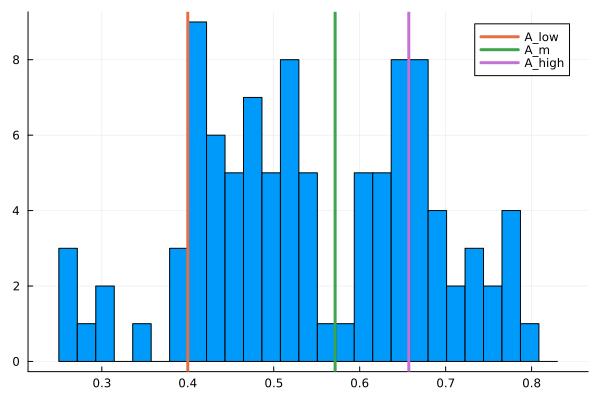

In [697]:
histograma(A_array, r_function(Eₜ, Eₜ₊₁), r⃰, c, B, b)

In [698]:
results(A_array, r_function(Eₜ, Eₜ₊₁), r⃰, c, B, b)

Row,A,credit,Im,Iu,I,Rm,Ru,Rf
,Float64,String,Real,Real,Real,Real,Real,Real
1,0.25,NO,0,0,0,0,0,0
2,0.255,NO,0,0,0,0,0,0
3,0.26,NO,0,0,0,0,0,0
4,0.29,NO,0,0,0,0,0,0
5,0.295,NO,0,0,0,0,0,0
6,0.302,NO,0,0,0,0,0,0
7,0.354,NO,0,0,0,0,0,0
8,0.381,NO,0,0,0,0,0,0
9,0.394,NO,0,0,0,0,0,0


### Depreciación de la moneda local en 50%

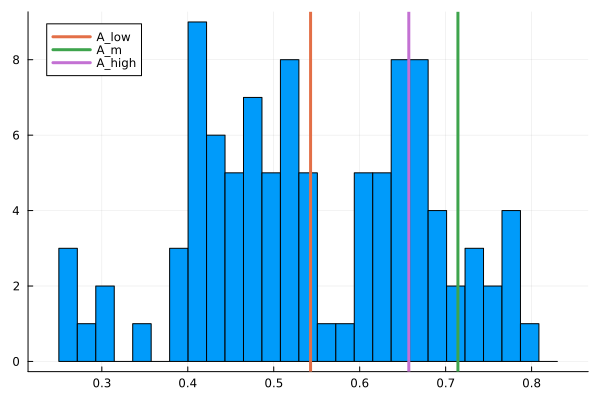

In [699]:
histograma(A_array, r_function(Eₜ, 1.5), r⃰, c, B, b)

In [700]:
results(A_array, r_function(Eₜ, 1.5), r⃰, c, B, b)

Row,A,credit,Im,Iu,I,Rm,Ru,Rf
,Float64,String,Real,Real,Real,Real,Real,Real
1,0.25,NO,0,0,0,0,0,0
2,0.255,NO,0,0,0,0,0,0
3,0.26,NO,0,0,0,0,0,0
4,0.29,NO,0,0,0,0,0,0
5,0.295,NO,0,0,0,0,0,0
6,0.302,NO,0,0,0,0,0,0
7,0.354,NO,0,0,0,0,0,0
8,0.381,NO,0,0,0,0,0,0
9,0.394,NO,0,0,0,0,0,0


### Depreciación de la moneda local en 100%

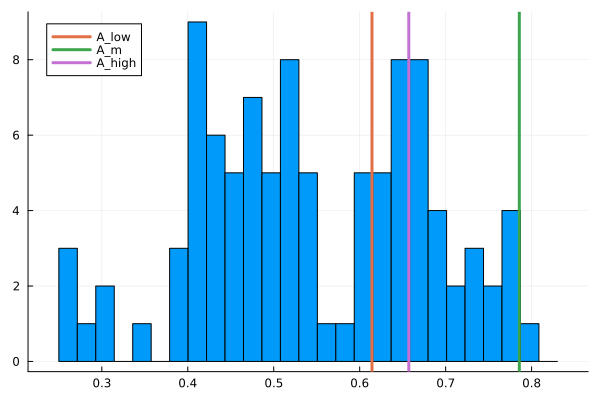

In [701]:
histograma(A_array, r_function(Eₜ, 2), r⃰, c, B, b)

In [702]:
results(A_array, r_function(Eₜ, 2), r⃰, c, B, b)

Row,A,credit,Im,Iu,I,Rm,Ru,Rf
,Float64,String,Real,Real,Real,Real,Real,Real
1,0.25,NO,0,0,0,0,0,0
2,0.255,NO,0,0,0,0,0,0
3,0.26,NO,0,0,0,0,0,0
4,0.29,NO,0,0,0,0,0,0
5,0.295,NO,0,0,0,0,0,0
6,0.302,NO,0,0,0,0,0,0
7,0.354,NO,0,0,0,0,0,0
8,0.381,NO,0,0,0,0,0,0
9,0.394,NO,0,0,0,0,0,0


In [703]:
resultados_wm = DataFrame(Caso=["Caso inicial", "↑Eₜ₊₁ (Eₜ₊₁=1.5)", "↑Eₜ₊₁ (Eₜ₊₁=2)"],
                    Empresas=1:3, Colateral=1:3, CreditoBancario=1:3,
                    CreditoMercadoCap=1:3, Inversion=1:3);

In [704]:
resultados_wm.Empresas = [length(results(A_array, r_function(Eₜ, Eₜ₊₁), r⃰, c, B, b)[results(A_array, r_function(Eₜ, Eₜ₊₁), r⃰, c, B, b).credit .== "SI", :A]),
                    length(results(A_array, r_function(Eₜ, 1.5), r⃰, c, B, b)[results(A_array, r_function(Eₜ, 1.5), r⃰, c, B, b).credit .== "SI", :A]),
                    length(results(A_array, r_function(Eₜ, 2), r⃰, c, B, b)[results(A_array, r_function(Eₜ, 2), r⃰, c, B, b).credit .== "SI", :A])];

In [705]:
resultados_wm.Colateral = round.([sum(results(A_array, r_function(Eₜ, Eₜ₊₁), r⃰, c, B, b)[results(A_array, r_function(Eₜ, Eₜ₊₁), r⃰, c, B, b).credit .== "SI", :A]),
                    sum(results(A_array, r_function(Eₜ, 1.5), r⃰, c, B, b)[results(A_array, r_function(Eₜ, 1.5), r⃰, c, B, b).credit .== "SI", :A]),
                    sum(results(A_array, r_function(Eₜ, 2), r⃰, c, B, b)[results(A_array, r_function(Eₜ, 2), r⃰, c, B, b).credit .== "SI", :A])], digits=2);

In [706]:
resultados_wm.CreditoBancario = round.([sum(results(A_array, r_function(Eₜ, Eₜ₊₁), r⃰, c, B, b)[!, :Im]),
                    sum(results(A_array, r_function(Eₜ, 1.5), r⃰, c, B, b)[!, :Im]),
                    sum(results(A_array, r_function(Eₜ, 2), r⃰, c, B, b)[!, :Im])], digits=2);

In [707]:
resultados_wm.CreditoMercadoCap = round.([sum(results(A_array, r_function(Eₜ, Eₜ₊₁), r⃰, c, B, b)[!, :Iu]),
                    sum(results(A_array, r_function(Eₜ, 1.5), r⃰, c, B, b)[!, :Iu]),
                    sum(results(A_array, r_function(Eₜ, 2), r⃰, c, B, b)[!, :Iu])], digits=2);

In [708]:
resultados_wm.Inversion = round.([sum(results(A_array, r_function(Eₜ, Eₜ₊₁), r⃰, c, B, b)[!, :I]),
                    sum(results(A_array, r_function(Eₜ, 1.5), r⃰, c, B, b)[!, :I]),
                    sum(results(A_array, r_function(Eₜ, 2), r⃰, c, B, b)[!, :I])], digits=2);

In [709]:
resultados_wm

Row,Caso,Empresas,Colateral,CreditoBancario,CreditoMercadoCap,Inversion
,String,Int64,Float64,Float64,Float64,Float64
1,Caso inicial,90,51.62,27.43,11.92,90.97
2,↑Eₜ₊₁ (Eₜ₊₁=1.5),46,30.97,5.71,9.32,46.0
3,↑Eₜ₊₁ (Eₜ₊₁=2),39,26.88,2.79,9.33,39.0
